<a href="https://colab.research.google.com/github/pamruta/Colab/blob/master/image_classification_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [0]:
# helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# the dataset has 10 classes for clothing
class_labels = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot']

In [0]:
# convert images to grey scale
train_images = train_images / 255.0
test_images = test_images / 255.0

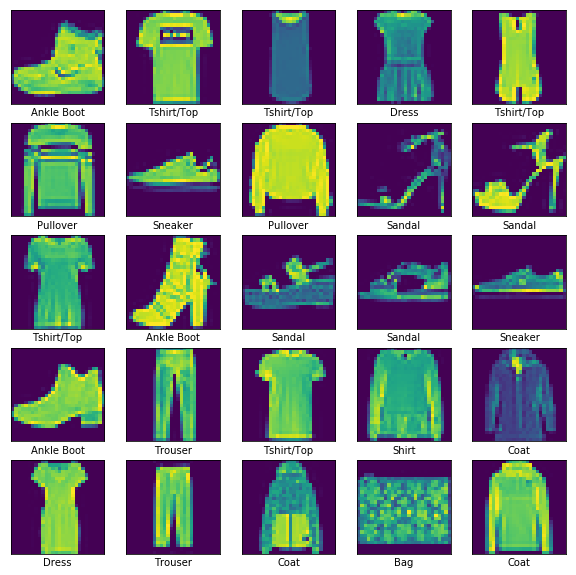

In [0]:
# plot few training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [0]:
# build model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          keras.layers.Dense(128, activation='relu'), 
                          keras.layers.Dense(10, activation='softmax')])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# train model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5006 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3752 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3383 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3118 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2949 - acc: 0.8919


In [0]:
# run model
predictions = model.predict(test_images)

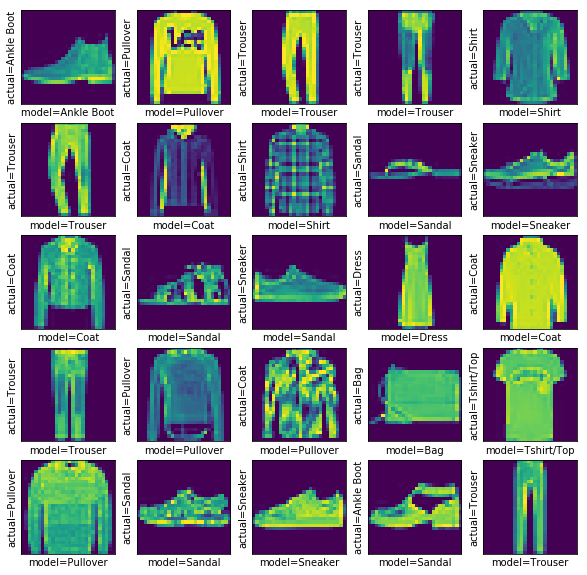

In [0]:
# plot predicted vs actual labels for few test images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    predicted_class = "model=" + class_labels[np.argmax(predictions[i])]
    plt.xlabel(predicted_class)
    true_class = "actual=" + class_labels[test_labels[i]]
    plt.ylabel(true_class)
plt.show()

In [0]:
# check accuracy on test images
model.evaluate(test_images, test_labels)[1]

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3466 - acc: 0.8754


0.8754

In [0]:
# yay, done!